# Data Analysis on Weather History Dataset

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
weather_df = pd.read_csv('data/weatherHistory.csv')

In [3]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [5]:
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc = True)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [7]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df = weather_df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [10]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

### Variation in Apparant temperature (C), Humidity and Wind Speed

In [11]:
data_columns = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h)
Formatted Date,,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000,17.114300
2006-01-01 00:00:00+00:00,-4.173708,0.834610,8.894211
2006-02-01 00:00:00+00:00,-2.990716,0.843467,10.957008
2006-03-01 00:00:00+00:00,1.969780,0.778737,14.421488
2006-04-01 00:00:00+00:00,12.098827,0.728625,10.930670


##### Plotting Variation in Apparent Temperature and Humidity with time

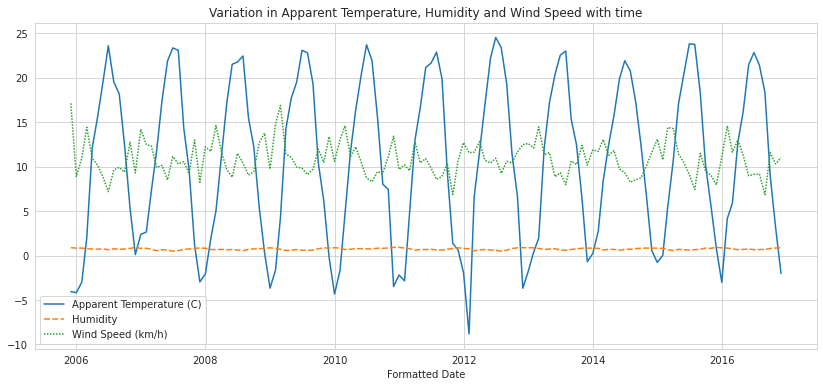

In [12]:
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature, Humidity and Wind Speed with time")
sns.lineplot(data=df_monthly_mean)
plt.show()

In [13]:
df_april = df_monthly_mean[df_monthly_mean.index.month == 4]

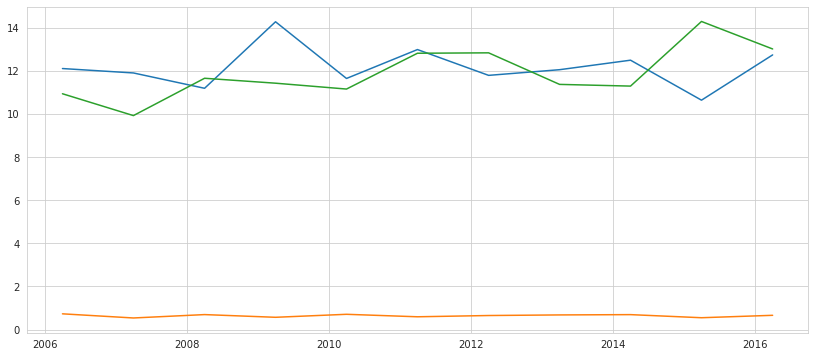

In [14]:
plt.figure(figsize = (14 , 6))
plt.plot(df_april)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10.632800925925926'),
  Text(1, 0, '11.183688271604938'),
  Text(2, 0, '11.639405864197531'),
  Text(3, 0, '11.782770061728396'),
  Text(4, 0, '11.894421296296297'),
  Text(5, 0, '12.045563271604937'),
  Text(6, 0, '12.098827160493826'),
  Text(7, 0, '12.486180555555555'),
  Text(8, 0, '12.731427469135802'),
  Text(9, 0, '12.978996913580247'),
  Text(10, 0, '14.26707561728395')])

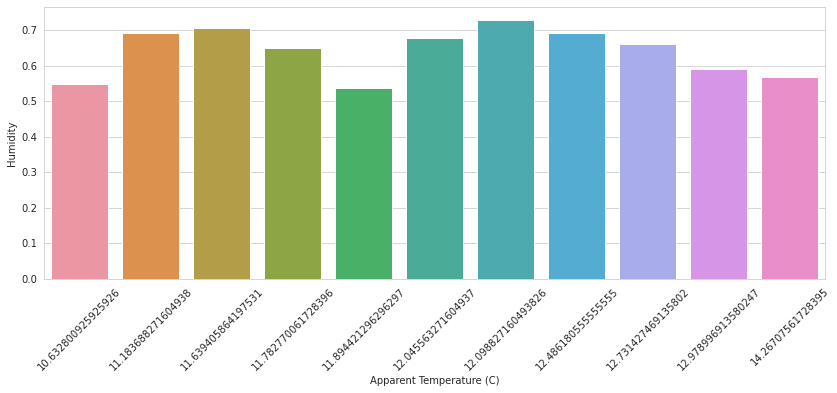

In [15]:
plt.figure(figsize = (14 , 5))
sns.barplot(x = 'Apparent Temperature (C)', y = 'Humidity', data = df_april)
plt.xticks(rotation = 45)

### Average of all factors to the weather

In [16]:
df1 = df.copy()
df1 = df1.reset_index()

In [17]:
# data_columns = 
mean_factor = df1.groupby('Summary')[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']].mean()
mean_factor = mean_factor.reset_index().sort_values(by = 'Temperature (C)', ascending=False)
mean_factor.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
9,Dry,29.083660,28.273529,0.230294,14.713979,230.294118,10.250965,0.0,1016.391765
22,Windy and Dry,27.222222,26.344444,0.240000,40.250000,150.000000,9.982000,0.0,1020.200000
10,Dry and Mostly Cloudy,26.838492,25.929365,0.242143,13.667750,187.785714,10.115400,0.0,1014.872143
11,Dry and Partly Cloudy,26.605749,25.982235,0.240814,12.304519,224.465116,10.987501,0.0,1017.242558
15,Humid and Partly Cloudy,21.568301,21.568301,0.848824,9.938435,201.647059,10.633576,0.0,1011.974118


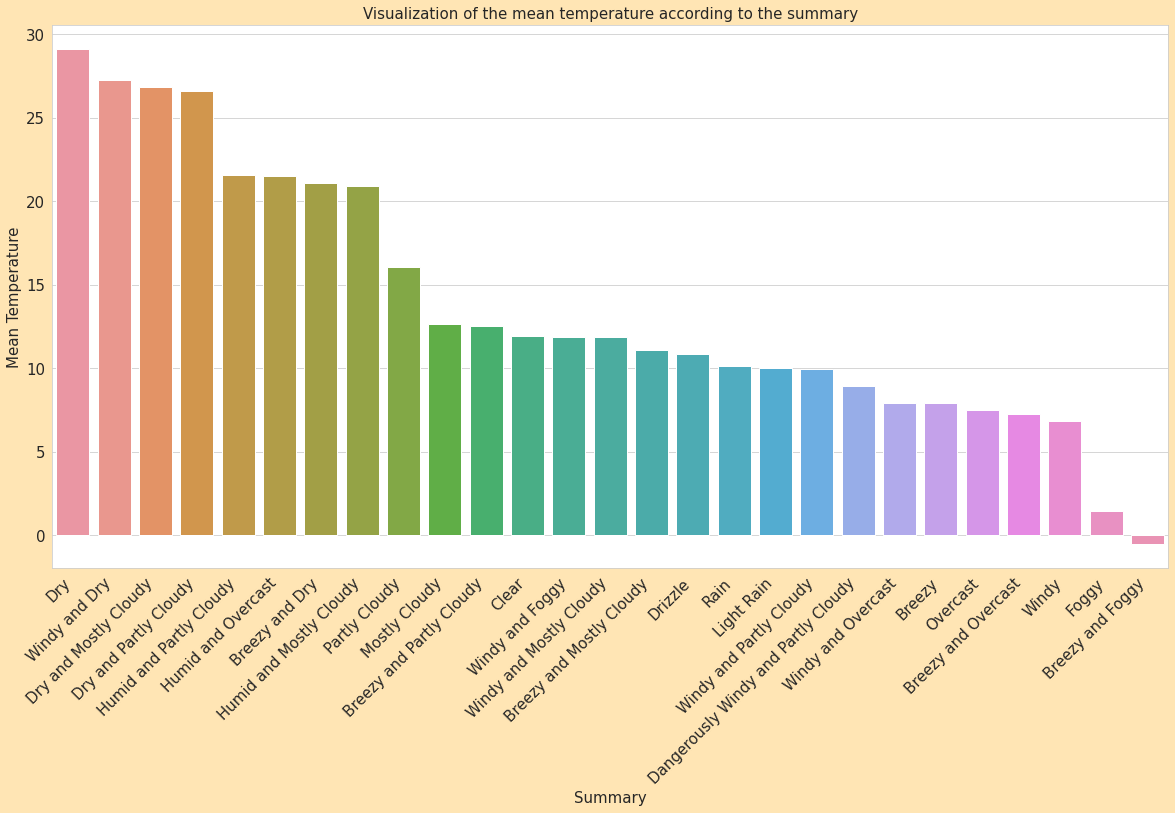

In [18]:
### Plotting bar plot to visualize mean temperature
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

sns.barplot(x = 'Summary', y = 'Temperature (C)', data=mean_factor)
plt.title('Visualization of the mean temperature according to the summary', fontsize = 15)
plt.xlabel('Summary', fontsize=15)
plt.ylabel('Mean Temperature', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Plotting Variation in Mean Apparent Temperature and Humidity according to the weathers

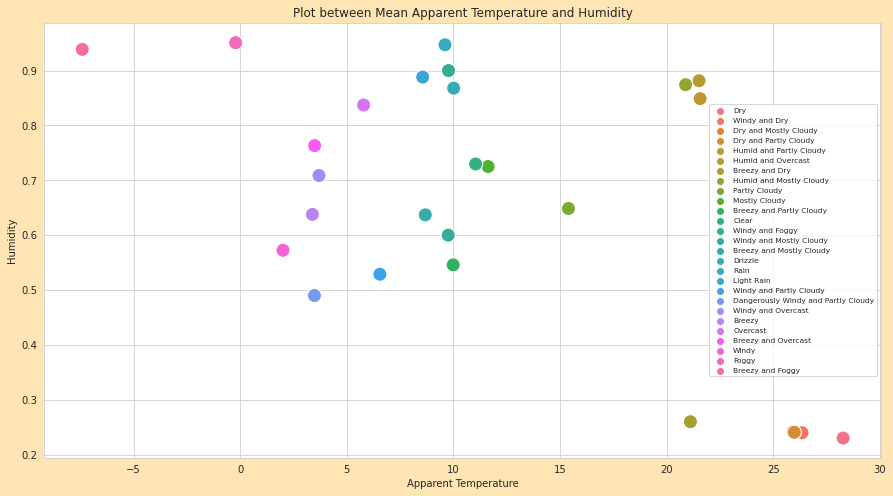

In [19]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

sns.scatterplot(x = mean_factor['Apparent Temperature (C)'], y = mean_factor['Humidity'], hue = mean_factor['Summary'], data = mean_factor, s = 200)

plt.title('Plot between Mean Apparent Temperature and Humidity')
plt.xlabel('Apparent Temperature')
plt.ylabel('Humidity')
plt.legend(loc = 'center right', fontsize='7.5')
plt.show()

### Plotting Variation in Mean Apparent Temperature and Humidity according to the weathers

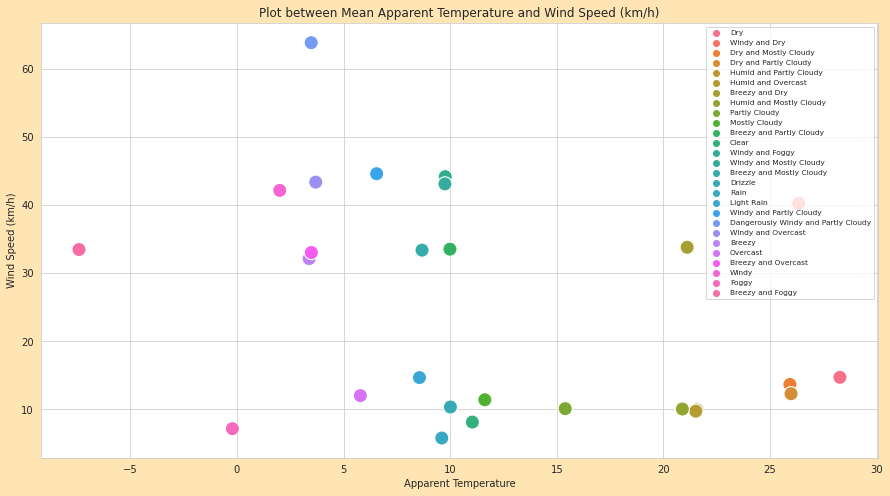

In [20]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

sns.scatterplot(x = mean_factor['Apparent Temperature (C)'], y = mean_factor['Wind Speed (km/h)'], hue = mean_factor['Summary'], data = mean_factor, s = 200)

plt.title('Plot between Mean Apparent Temperature and Wind Speed (km/h)')
plt.xlabel('Apparent Temperature')
plt.ylabel('Wind Speed (km/h)')
plt.legend(loc = 'best', fontsize='7.5')
plt.show()

### Mean Temp. vs Mean Visibility

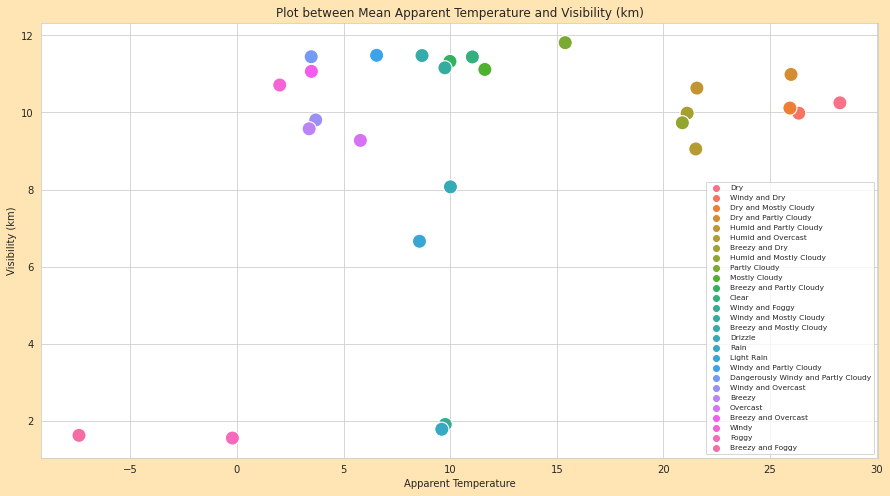

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

sns.scatterplot(x = mean_factor['Apparent Temperature (C)'], y = mean_factor['Visibility (km)'], hue = mean_factor['Summary'], data = mean_factor, s = 200)

plt.title('Plot between Mean Apparent Temperature and Visibility (km)')
plt.xlabel('Apparent Temperature')
plt.ylabel('Visibility (km)')
plt.legend(loc = 'lower right', fontsize='7.5')
plt.show()

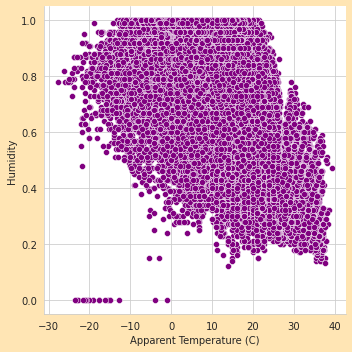

In [22]:
sns.relplot(data = weather_df, x = "Apparent Temperature (C)", y = "Humidity", color = 'purple')
plt.show()

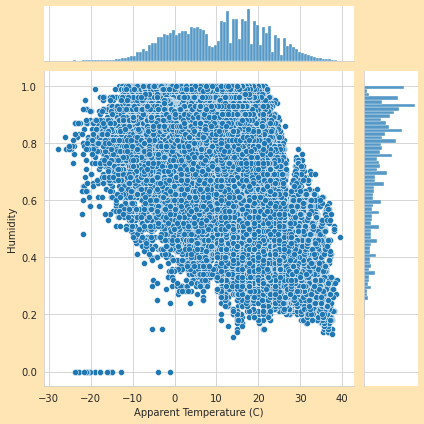

In [23]:
sns.jointplot(data = weather_df, x = "Apparent Temperature (C)", y = "Humidity")
plt.show()

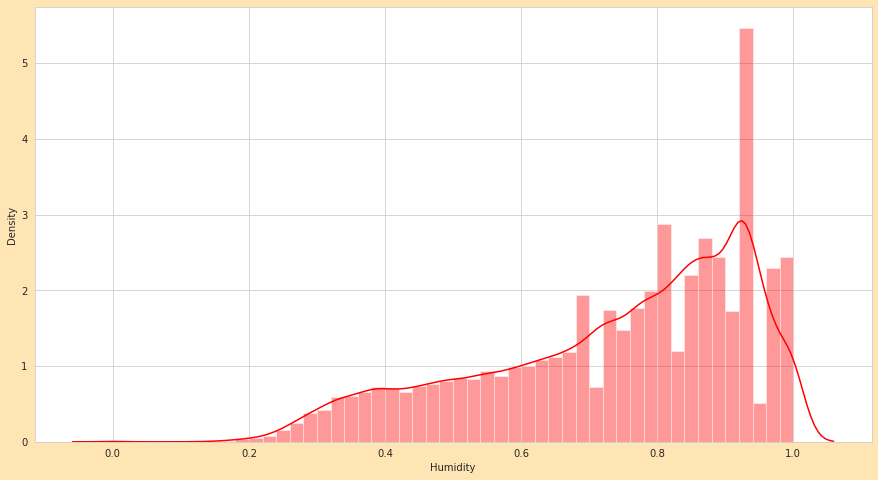

In [24]:
sns.distplot(df.Humidity, color = 'red')
plt.show()

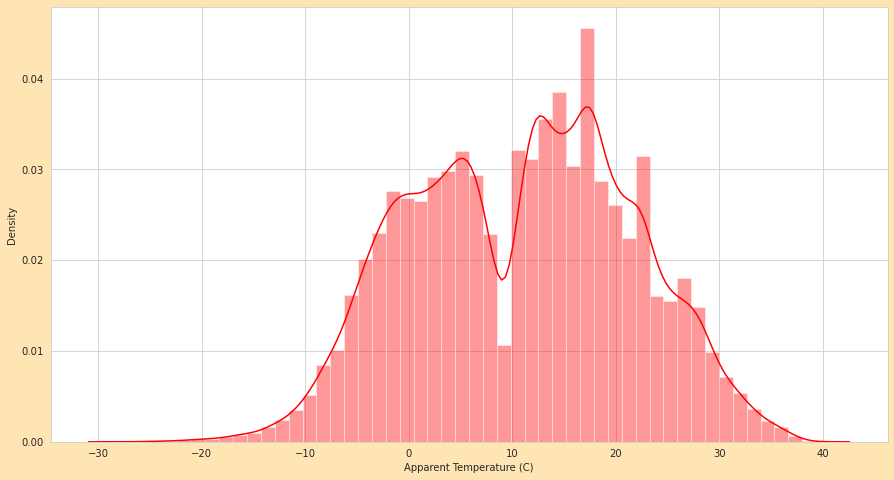

In [26]:
sns.distplot(df['Apparent Temperature (C)'], color = 'red')
plt.show()

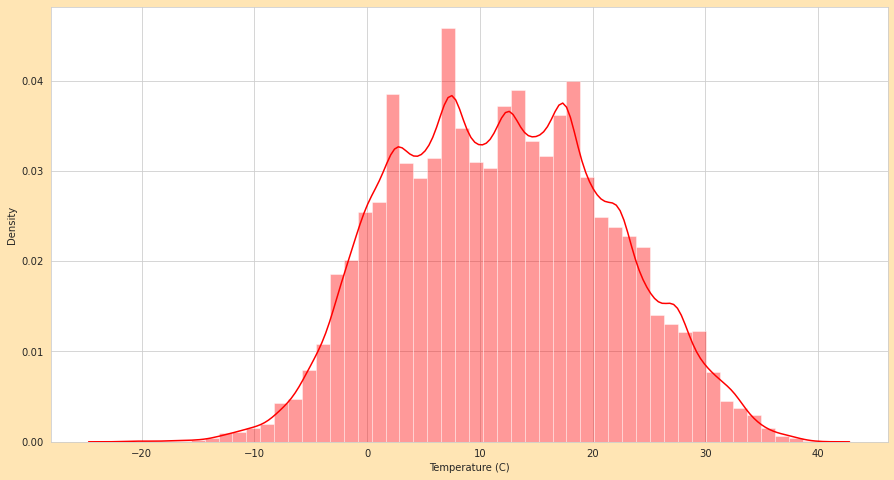

In [27]:
sns.distplot(df['Temperature (C)'], color = 'red')
plt.show()

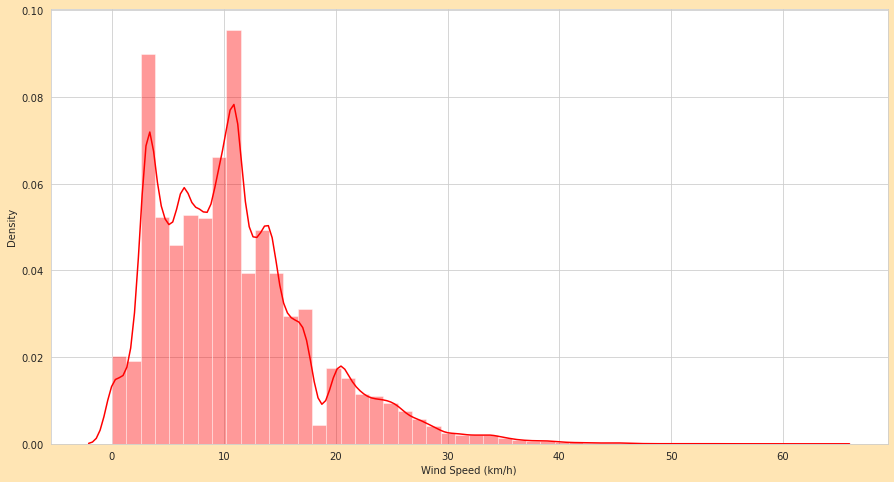

In [28]:
sns.distplot(df['Wind Speed (km/h)'], color = 'red')
plt.show()

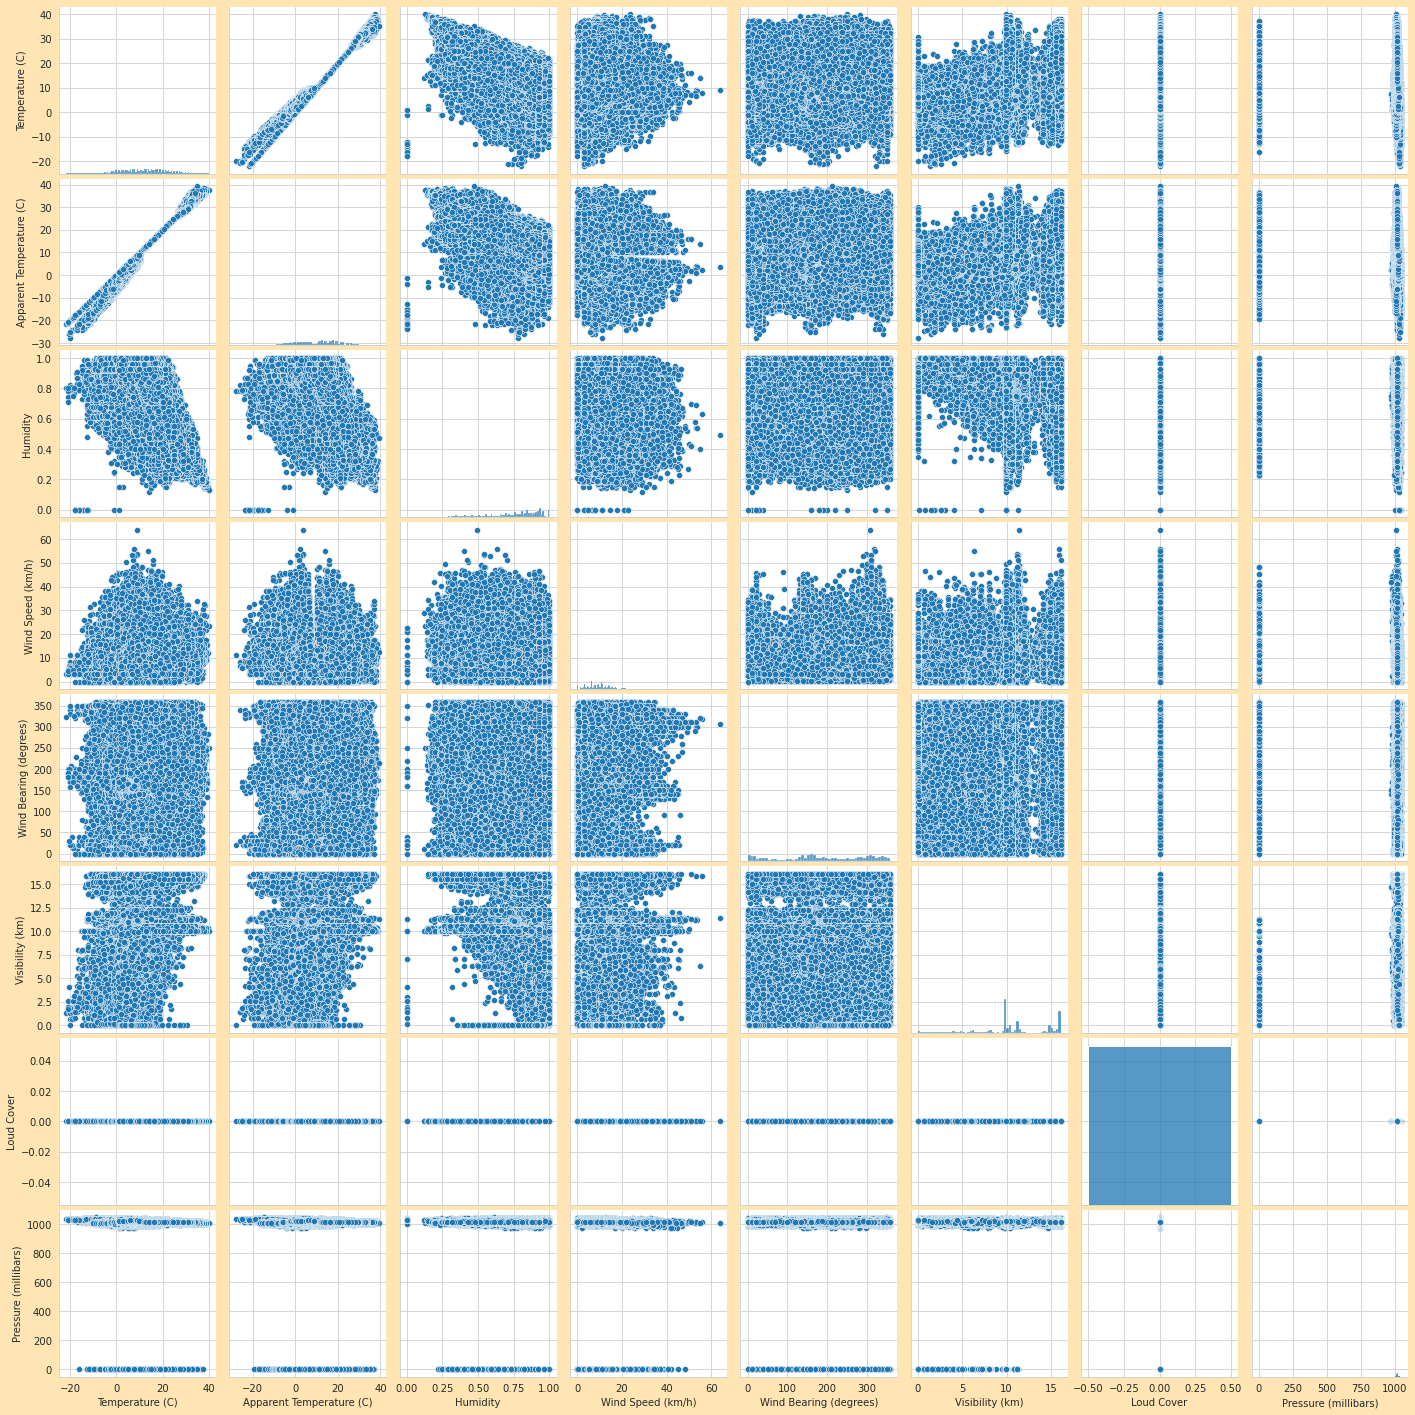

In [25]:
sns.pairplot(weather_df)